In [267]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle
import sys
from sklearn.metrics import mean_squared_error

In [268]:
sys.path.insert(0, '..')

In [269]:
with open('../best_model.pkl', 'rb') as f:
    model = pickle.load(f)

/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Lasso from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:35:09] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:35:09] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [270]:
model

XGBOnLinReg(alpha=3.1, device='gpu', learning_rate=0.08, max_depth=5,
            n_estimators=433, subsample=0.8)

In [271]:
dataset = pd.read_csv('../splits/dataset.csv')

In [272]:
X_test = pd.read_csv('../splits/X_test.csv')

In [273]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)

In [274]:
X_test

date  lon_rounded_up  lat_rounded_up        o2       chl       no3   
0       610             -95             -10  1.116656 -0.491450  0.047801  \
1       610             -95              -5  0.451582 -0.231764  1.044927   
2       610             -95               0 -1.018040  0.386777  2.228068   
3       610             -95               5 -0.639054 -0.184053  0.449328   
4       610             -95              10 -1.424603 -0.094073  0.578581   
...     ...             ...             ...       ...       ...       ...   
24781   762               0             -10  0.033041 -0.493187 -0.355084   
24782   762               0              -5 -0.548615 -0.349968 -0.159290   
24783   762               0               0 -0.373003  0.073440  0.113240   
24784   762               0               5 -0.277895  0.769255  0.209416   
24785   762               0              10 -0.220189  2.625458  0.792170   

            po4        si  salinity      temp  ...  salinity_lag_59   
0      1.720371  0.603321  0.040990 -1.074772  ...         0.026413  \
1      2.515528  1.728150 -0.058102 -0.460978  ...        -0.097442   
2      2.983338  2.959818 -0.165277 -0.565714  ...        -0.169231   
3      1.263440  0.852580 -0.642969  0.566984  ...        -0.530431   
4      0.957442  0.373819 -0.804606  0.719884  ...        -0.737647   
...         ...       ...       ...       ...  ...              ...   
24781 -0.187822 -0.662790  0.351170  0.221984  ...         0.295103   
24782 -0.118827 -0.495822  0.140582  0.771239  ...         0.209578   
24783  0.004906 -0.446959 -0.195972  0.673542  ...         0.049603   
24784 -0.043516 -0.549325 -0.238408  0.810580  ...        -0.348804   
24785  0.410392 -0.543971 -0.016578 -0.264869  ...        -0.302646   

       temp_lag_59  o2_lag_59  chl_lag_60  no3_lag_60  po4_lag_60  si_lag_60   
0        -0.761699   0.835826   -0.497189   -0.043738    1.610306   0.206711  \
1        -0.190279   0.144520   -0.347460    0.376830    2.190353   1.532341   
2        -0.009983  -0.968355    0.160217    1.759002    2.657375   2.643030   
3         0.671324  -0.896982   -0.112863    0.656469    1.516295   1.273888   
4         0.768882  -1.275963   -0.011288    0.466039    0.970463   0.132182   
...            ...        ...         ...         ...         ...        ...   
24781    -0.466167   0.789595   -0.534495   -0.386364   -0.166308  -0.564004   
24782     0.073344  -0.033995   -0.235058   -0.140021   -0.058315  -0.552765   
24783     0.415318  -0.364085   -0.051691   -0.046116   -0.005081  -0.390881   
24784     1.090935   0.046144   -0.016982   -0.170621   -0.264882  -0.388825   
24785     0.782239  -0.051025    0.802866    0.203037    0.029563  -0.353725   

       salinity_lag_60  temp_lag_60  o2_lag_60  
0             0.025755    -0.753666   0.832154  
1            -0.098985    -0.182387   0.145147  
2            -0.161780     0.003284  -0.973691  
3            -0.528780     0.703924  -0.837050  
4            -0.740493     0.801735  -1.280216  
...                ...          ...        ...  
24781         0.293369    -0.479838   0.793360  
24782         0.208553     0.074480  -0.023921  
24783         0.066145     0.422128  -0.345303  
24784        -0.341387     1.099525   0.078466  
24785        -0.311200     0.852100  -0.011907  

[24786 rows x 431 columns]

In [275]:
num_dates = X_test['date'].nunique()

In [276]:
num_dates

153

In [277]:
num_days = 30

In [278]:
chem_features = ['o2', 'chl', 'no3', 'po4', 'si', 'salinity', 'temp']

In [279]:
num_channels = len(chem_features)

In [280]:
num_x = X_test['lon_rounded_up'].nunique()
num_y = X_test['lat_rounded_up'].nunique()

In [281]:
y_test = pd.read_csv('../splits/y_test.csv')

In [282]:
y_test.drop('Unnamed: 0', axis=1, inplace=True)

In [283]:
y_test

chl_lead_1  no3_lead_1  po4_lead_1  si_lead_1  salinity_lead_1   
0       -0.490135    0.047152    1.726535   0.615264         0.038159  \
1       -0.239605    1.027331    2.512173   1.719198        -0.054695   
2        0.365646    2.175927    2.966549   2.920047        -0.173219   
3       -0.181189    0.422655    1.250025   0.836634        -0.645555   
4       -0.009744    0.590497    0.967197   0.399424        -0.794619   
...           ...         ...         ...        ...              ...   
24781   -0.497094   -0.356485   -0.188569  -0.664633         0.351838   
24782   -0.359309   -0.168465   -0.125452  -0.498863         0.137200   
24783    0.059689    0.068394   -0.023172  -0.470419        -0.193447   
24784    0.758824    0.213606   -0.040840  -0.552351        -0.238548   
24785    2.775950    0.812076    0.421470  -0.530975        -0.009408   

       temp_lead_1  o2_lead_1  chl_lead_2  no3_lead_2  po4_lead_2  ...   
0        -1.076592   1.127043   -0.490282    0.045818    1.731589  ...  \
1        -0.468369   0.465026   -0.241066    1.026096    2.516784  ...   
2        -0.519291  -0.970585    0.340943    2.109589    2.942928  ...   
3         0.587152  -0.636471   -0.174458    0.419717    1.245203  ...   
4         0.692810  -1.457644    0.003755    0.578002    0.964647  ...   
...            ...        ...         ...         ...         ...  ...   
24781     0.227372   0.033691   -0.500226   -0.355367   -0.187975  ...   
24782     0.791876  -0.547621   -0.365916   -0.165438   -0.124292  ...   
24783     0.706361  -0.313398    0.026144    0.013875   -0.058974  ...   
24784     0.802214  -0.300557    0.754215    0.211193   -0.044014  ...   
24785    -0.336774  -0.243979    2.643978    0.845538    0.441639  ...   

       salinity_lead_29  temp_lead_29  o2_lead_29  chl_lead_30  no3_lead_30   
0              0.004228     -1.036583    1.190587    -0.468675     0.196949  \
1             -0.087671     -0.383866    0.524969    -0.172958     1.385108   
2             -0.237556     -0.359211   -0.871411     0.134471     1.966834   
3             -0.811350      0.623832   -0.633291    -0.227958     0.283614   
4             -0.883053      0.606567   -1.534454     0.076005     0.707184   
...                 ...           ...         ...          ...          ...   
24781          0.316304      0.383526   -0.084129    -0.451942    -0.351085   
24782          0.078018      0.984118   -0.607200    -0.316046    -0.193660   
24783         -0.221448      1.248428   -0.239092    -0.282179    -0.241807   
24784         -0.302745      1.394183   -0.158657    -0.062469    -0.197671   
24785         -0.071189      0.523718   -0.007008     1.101408     0.430806   

       po4_lead_30  si_lead_30  salinity_lead_30  temp_lead_30  o2_lead_30  
0         1.852752    0.883812          0.006706     -1.030369    1.190330  
1         2.510516    1.575379         -0.093290     -0.373955    0.531657  
2         2.797216    2.696940         -0.234920     -0.378247   -0.864178  
3         1.091803    0.767699         -0.818422      0.604897   -0.601425  
4         1.025114    0.490203         -0.878042      0.635121   -1.554141  
...            ...         ...               ...           ...         ...  
24781    -0.191311   -0.675234          0.318425      0.379873   -0.086938  
24782    -0.168629   -0.506454          0.075070      0.979585   -0.606863  
24783    -0.263701   -0.604519         -0.211823      1.225105   -0.269852  
24784    -0.336500   -0.638028         -0.302906      1.411908   -0.169832  
24785     0.202989   -0.372406         -0.065464      0.513835   -0.084309  

[24786 rows x 210 columns]

In [284]:
y_test.rename({feature + f'_lead_{i}': feature + f'_t_{i}' for i in range(1, 31)
           for feature in chem_features}, axis=1, inplace=True)

In [285]:
y_pred = model.predict(X_test)

In [286]:
y_pred = pd.DataFrame(y_pred)

In [287]:
y_pred.columns = y_test.columns

In [288]:
y_pred

chl_t_1   no3_t_1   po4_t_1    si_t_1  salinity_t_1  temp_t_1   
0     -0.496770 -0.018336  1.683243  0.553188      0.036376 -1.081432  \
1     -0.246349  1.040383  2.520523  1.690078     -0.091151 -0.451405   
2      0.352522  2.230370  2.930127  3.074933     -0.163264 -0.556856   
3     -0.188958  0.472015  1.288611  0.908264     -0.640389  0.583447   
4     -0.094187  0.626161  0.997604  0.419152     -0.799495  0.717515   
...         ...       ...       ...       ...           ...       ...   
24781 -0.503783 -0.379761 -0.178070 -0.661963      0.342217  0.234213   
24782 -0.391042 -0.150056 -0.081935 -0.500768      0.141560  0.786484   
24783  0.034494  0.099464  0.011690 -0.460710     -0.178205  0.686992   
24784  0.668206  0.208276 -0.064891 -0.563326     -0.226618  0.825328   
24785  2.801798  0.835830  0.438057 -0.457162     -0.025476 -0.273731   

         o2_t_1   chl_t_2   no3_t_2   po4_t_2  ...  salinity_t_29  temp_t_29   
0      1.151493 -0.500701 -0.006987  1.705603  ...       0.015847  -1.147527  \
1      0.465147 -0.255774  1.038653  2.539559  ...      -0.090848  -0.360430   
2     -1.041477  0.341088  2.149383  2.885598  ...      -0.165466  -0.350559   
3     -0.601620 -0.155824  0.447831  1.297681  ...      -0.632372   0.826991   
4     -1.475230 -0.109230  0.594700  0.981238  ...      -0.733220   1.050134   
...         ...       ...       ...       ...  ...            ...        ...   
24781  0.036345 -0.506768 -0.365914 -0.172282  ...       0.324820   0.149413   
24782 -0.546603 -0.376037 -0.163588 -0.077541  ...       0.107997   0.752153   
24783 -0.359851  0.050805  0.077671  0.029183  ...      -0.117082   0.777209   
24784 -0.275265  0.681681  0.195842 -0.022400  ...      -0.164251   0.976513   
24785 -0.249872  2.824172  0.899803  0.433344  ...      -0.080580  -0.165347   

        o2_t_29  chl_t_30  no3_t_30  po4_t_30   si_t_30  salinity_t_30   
0      1.245572 -0.524264  0.062698  1.608768  0.632534       0.015781  \
1      0.553533 -0.216841  1.106144  2.382333  1.486333      -0.088260   
2     -0.995805  0.511641  1.849308  2.803701  3.116198      -0.185639   
3     -0.861805 -0.160606  0.660233  1.261883  0.876779      -0.623459   
4     -1.259189 -0.137013  0.701283  0.979129  0.579914      -0.731656   
...         ...       ...       ...       ...       ...            ...   
24781  0.020998 -0.465035 -0.391274 -0.215195 -0.621383       0.329625   
24782 -0.422846 -0.423948 -0.134828 -0.167681 -0.544617       0.073275   
24783 -0.222150 -0.083890 -0.115641 -0.135587 -0.553115      -0.114790   
24784 -0.404631  0.294549  0.123047 -0.018953 -0.581227      -0.204165   
24785 -0.709387  2.190420  1.050241  0.740900 -0.300796      -0.094252   

       temp_t_30   o2_t_30  
0      -1.108461  1.300652  
1      -0.371017  0.585377  
2      -0.418634 -1.007011  
3       0.773244 -0.807803  
4       1.027296 -1.331430  
...          ...       ...  
24781   0.172438  0.043448  
24782   0.524724 -0.442986  
24783   0.697373 -0.177325  
24784   1.001764 -0.369898  
24785  -0.319252 -0.440025  

[24786 rows x 210 columns]

In [289]:
y_test

chl_t_1   no3_t_1   po4_t_1    si_t_1  salinity_t_1  temp_t_1   
0     -0.490135  0.047152  1.726535  0.615264      0.038159 -1.076592  \
1     -0.239605  1.027331  2.512173  1.719198     -0.054695 -0.468369   
2      0.365646  2.175927  2.966549  2.920047     -0.173219 -0.519291   
3     -0.181189  0.422655  1.250025  0.836634     -0.645555  0.587152   
4     -0.009744  0.590497  0.967197  0.399424     -0.794619  0.692810   
...         ...       ...       ...       ...           ...       ...   
24781 -0.497094 -0.356485 -0.188569 -0.664633      0.351838  0.227372   
24782 -0.359309 -0.168465 -0.125452 -0.498863      0.137200  0.791876   
24783  0.059689  0.068394 -0.023172 -0.470419     -0.193447  0.706361   
24784  0.758824  0.213606 -0.040840 -0.552351     -0.238548  0.802214   
24785  2.775950  0.812076  0.421470 -0.530975     -0.009408 -0.336774   

         o2_t_1   chl_t_2   no3_t_2   po4_t_2  ...  salinity_t_29  temp_t_29   
0      1.127043 -0.490282  0.045818  1.731589  ...       0.004228  -1.036583  \
1      0.465026 -0.241066  1.026096  2.516784  ...      -0.087671  -0.383866   
2     -0.970585  0.340943  2.109589  2.942928  ...      -0.237556  -0.359211   
3     -0.636471 -0.174458  0.419717  1.245203  ...      -0.811350   0.623832   
4     -1.457644  0.003755  0.578002  0.964647  ...      -0.883053   0.606567   
...         ...       ...       ...       ...  ...            ...        ...   
24781  0.033691 -0.500226 -0.355367 -0.187975  ...       0.316304   0.383526   
24782 -0.547621 -0.365916 -0.165438 -0.124292  ...       0.078018   0.984118   
24783 -0.313398  0.026144  0.013875 -0.058974  ...      -0.221448   1.248428   
24784 -0.300557  0.754215  0.211193 -0.044014  ...      -0.302745   1.394183   
24785 -0.243979  2.643978  0.845538  0.441639  ...      -0.071189   0.523718   

        o2_t_29  chl_t_30  no3_t_30  po4_t_30   si_t_30  salinity_t_30   
0      1.190587 -0.468675  0.196949  1.852752  0.883812       0.006706  \
1      0.524969 -0.172958  1.385108  2.510516  1.575379      -0.093290   
2     -0.871411  0.134471  1.966834  2.797216  2.696940      -0.234920   
3     -0.633291 -0.227958  0.283614  1.091803  0.767699      -0.818422   
4     -1.534454  0.076005  0.707184  1.025114  0.490203      -0.878042   
...         ...       ...       ...       ...       ...            ...   
24781 -0.084129 -0.451942 -0.351085 -0.191311 -0.675234       0.318425   
24782 -0.607200 -0.316046 -0.193660 -0.168629 -0.506454       0.075070   
24783 -0.239092 -0.282179 -0.241807 -0.263701 -0.604519      -0.211823   
24784 -0.158657 -0.062469 -0.197671 -0.336500 -0.638028      -0.302906   
24785 -0.007008  1.101408  0.430806  0.202989 -0.372406      -0.065464   

       temp_t_30   o2_t_30  
0      -1.030369  1.190330  
1      -0.373955  0.531657  
2      -0.378247 -0.864178  
3       0.604897 -0.601425  
4       0.635121 -1.554141  
...          ...       ...  
24781   0.379873 -0.086938  
24782   0.979585 -0.606863  
24783   1.225105 -0.269852  
24784   1.411908 -0.169832  
24785   0.513835 -0.084309  

[24786 rows x 210 columns]

In [290]:
mean_squared_error(y_test, y_pred)

0.20273050898720404

In [291]:
y_pred = y_pred[[feature + f'_t_{i}' for i in range(1, 31) for feature in chem_features]]

In [292]:
y_pred

o2_t_1   chl_t_1   no3_t_1   po4_t_1    si_t_1  salinity_t_1   
0      1.151493 -0.496770 -0.018336  1.683243  0.553188      0.036376  \
1      0.465147 -0.246349  1.040383  2.520523  1.690078     -0.091151   
2     -1.041477  0.352522  2.230370  2.930127  3.074933     -0.163264   
3     -0.601620 -0.188958  0.472015  1.288611  0.908264     -0.640389   
4     -1.475230 -0.094187  0.626161  0.997604  0.419152     -0.799495   
...         ...       ...       ...       ...       ...           ...   
24781  0.036345 -0.503783 -0.379761 -0.178070 -0.661963      0.342217   
24782 -0.546603 -0.391042 -0.150056 -0.081935 -0.500768      0.141560   
24783 -0.359851  0.034494  0.099464  0.011690 -0.460710     -0.178205   
24784 -0.275265  0.668206  0.208276 -0.064891 -0.563326     -0.226618   
24785 -0.249872  2.801798  0.835830  0.438057 -0.457162     -0.025476   

       temp_t_1    o2_t_2   chl_t_2   no3_t_2  ...   si_t_29  salinity_t_29   
0     -1.081432  1.148092 -0.500701 -0.006987  ...  0.557908       0.015847  \
1     -0.451405  0.499867 -0.255774  1.038653  ...  1.677751      -0.090848   
2     -0.556856 -1.005648  0.341088  2.149383  ...  3.098791      -0.165466   
3      0.583447 -0.611688 -0.155824  0.447831  ...  1.128811      -0.632372   
4      0.717515 -1.505260 -0.109230  0.594700  ...  0.610524      -0.733220   
...         ...       ...       ...       ...  ...       ...            ...   
24781  0.234213  0.033072 -0.506768 -0.365914  ... -0.638369       0.324820   
24782  0.786484 -0.518278 -0.376037 -0.163588  ... -0.558209       0.107997   
24783  0.686992 -0.335864  0.050805  0.077671  ... -0.529769      -0.117082   
24784  0.825328 -0.280487  0.681681  0.195842  ... -0.564398      -0.164251   
24785 -0.273731 -0.228030  2.824172  0.899803  ... -0.387319      -0.080580   

       temp_t_29   o2_t_30  chl_t_30  no3_t_30  po4_t_30   si_t_30   
0      -1.147527  1.300652 -0.524264  0.062698  1.608768  0.632534  \
1      -0.360430  0.585377 -0.216841  1.106144  2.382333  1.486333   
2      -0.350559 -1.007011  0.511641  1.849308  2.803701  3.116198   
3       0.826991 -0.807803 -0.160606  0.660233  1.261883  0.876779   
4       1.050134 -1.331430 -0.137013  0.701283  0.979129  0.579914   
...          ...       ...       ...       ...       ...       ...   
24781   0.149413  0.043448 -0.465035 -0.391274 -0.215195 -0.621383   
24782   0.752153 -0.442986 -0.423948 -0.134828 -0.167681 -0.544617   
24783   0.777209 -0.177325 -0.083890 -0.115641 -0.135587 -0.553115   
24784   0.976513 -0.369898  0.294549  0.123047 -0.018953 -0.581227   
24785  -0.165347 -0.440025  2.190420  1.050241  0.740900 -0.300796   

       salinity_t_30  temp_t_30  
0           0.015781  -1.108461  
1          -0.088260  -0.371017  
2          -0.185639  -0.418634  
3          -0.623459   0.773244  
4          -0.731656   1.027296  
...              ...        ...  
24781       0.329625   0.172438  
24782       0.073275   0.524724  
24783      -0.114790   0.697373  
24784      -0.204165   1.001764  
24785      -0.094252  -0.319252  

[24786 rows x 210 columns]

In [293]:
X_test.set_index(['date', 'lon_rounded_up', 'lat_rounded_up'], inplace=True)

In [294]:
X_test

o2       chl       no3       po4   
date lon_rounded_up lat_rounded_up                                           
610  -95            -10             1.116656 -0.491450  0.047801  1.720371  \
                    -5              0.451582 -0.231764  1.044927  2.515528   
                     0             -1.018040  0.386777  2.228068  2.983338   
                     5             -0.639054 -0.184053  0.449328  1.263440   
                     10            -1.424603 -0.094073  0.578581  0.957442   
...                                      ...       ...       ...       ...   
762   0             -10             0.033041 -0.493187 -0.355084 -0.187822   
                    -5             -0.548615 -0.349968 -0.159290 -0.118827   
                     0             -0.373003  0.073440  0.113240  0.004906   
                     5             -0.277895  0.769255  0.209416 -0.043516   
                     10            -0.220189  2.625458  0.792170  0.410392   

                                          si  salinity      temp  elevation   
date lon_rounded_up lat_rounded_up                                            
610  -95            -10             0.603321  0.040990 -1.074772 -3849.2820  \
                    -5              1.728150 -0.058102 -0.460978 -3892.6504   
                     0              2.959818 -0.165277 -0.565714 -3487.2504   
                     5              0.852580 -0.642969  0.566984 -3276.1233   
                     10             0.373819 -0.804606  0.719884 -3636.0646   
...                                      ...       ...       ...        ...   
762   0             -10            -0.662790  0.351170  0.221984 -4937.6521   
                    -5             -0.495822  0.140582  0.771239 -4567.3715   
                     0             -0.446959 -0.195972  0.673542 -4771.7100   
                     5             -0.549325 -0.238408  0.810580 -4243.9490   
                     10            -0.543971 -0.016578 -0.264869   177.3200   

                                    chl_lag_1  no3_lag_1  ...   
date lon_rounded_up lat_rounded_up                        ...   
610  -95            -10             -0.493317   0.051687  ...  \
                    -5              -0.228470   1.061995  ...   
                     0               0.390244   2.224361  ...   
                     5              -0.175950   0.500533  ...   
                     10             -0.150731   0.502754  ...   
...                                       ...        ...  ...   
762   0             -10             -0.489367  -0.354569  ...   
                    -5              -0.346954  -0.149922  ...   
                     0               0.092710   0.127685  ...   
                     5               0.797626   0.214619  ...   
                     10              2.322235   0.698392  ...   

                                    salinity_lag_59  temp_lag_59  o2_lag_59   
date lon_rounded_up lat_rounded_up                                            
610  -95            -10                    0.026413    -0.761699   0.835826  \
                    -5                    -0.097442    -0.190279   0.144520   
                     0                    -0.169231    -0.009983  -0.968355   
                     5                    -0.530431     0.671324  -0.896982   
                     10                   -0.737647     0.768882  -1.275963   
...                                             ...          ...        ...   
762   0             -10                    0.295103    -0.466167   0.789595   
                    -5                     0.209578     0.073344  -0.033995   
                     0                     0.049603     0.415318  -0.364085   
                     5                    -0.348804     1.090935   0.046144   
                     10                   -0.302646     0.782239  -0.051025   

                                    chl_lag_60  no3_lag_60  po4_lag_60   
date lon_rounded_up lat_rounded_up                 

In [295]:
y_test.index = X_test.index

In [296]:
y_test

chl_t_1   no3_t_1   po4_t_1    si_t_1   
date lon_rounded_up lat_rounded_up                                           
610  -95            -10            -0.490135  0.047152  1.726535  0.615264  \
                    -5             -0.239605  1.027331  2.512173  1.719198   
                     0              0.365646  2.175927  2.966549  2.920047   
                     5             -0.181189  0.422655  1.250025  0.836634   
                     10            -0.009744  0.590497  0.967197  0.399424   
...                                      ...       ...       ...       ...   
762   0             -10            -0.497094 -0.356485 -0.188569 -0.664633   
                    -5             -0.359309 -0.168465 -0.125452 -0.498863   
                     0              0.059689  0.068394 -0.023172 -0.470419   
                     5              0.758824  0.213606 -0.040840 -0.552351   
                     10             2.775950  0.812076  0.421470 -0.530975   

                                    salinity_t_1  temp_t_1    o2_t_1   
date lon_rounded_up lat_rounded_up                                     
610  -95            -10                 0.038159 -1.076592  1.127043  \
                    -5                 -0.054695 -0.468369  0.465026   
                     0                 -0.173219 -0.519291 -0.970585   
                     5                 -0.645555  0.587152 -0.636471   
                     10                -0.794619  0.692810 -1.457644   
...                                          ...       ...       ...   
762   0             -10                 0.351838  0.227372  0.033691   
                    -5                  0.137200  0.791876 -0.547621   
                     0                 -0.193447  0.706361 -0.313398   
                     5                 -0.238548  0.802214 -0.300557   
                     10                -0.009408 -0.336774 -0.243979   

                                     chl_t_2   no3_t_2   po4_t_2  ...   
date lon_rounded_up lat_rounded_up                                ...   
610  -95            -10            -0.490282  0.045818  1.731589  ...  \
                    -5             -0.241066  1.026096  2.516784  ...   
                     0              0.340943  2.109589  2.942928  ...   
                     5             -0.174458  0.419717  1.245203  ...   
                     10             0.003755  0.578002  0.964647  ...   
...                                      ...       ...       ...  ...   
762   0             -10            -0.500226 -0.355367 -0.187975  ...   
                    -5             -0.365916 -0.165438 -0.124292  ...   
                     0              0.026144  0.013875 -0.058974  ...   
                     5              0.754215  0.211193 -0.044014  ...   
                     10             2.643978  0.845538  0.441639  ...   

                                    salinity_t_29  temp_t_29   o2_t_29   
date lon_rounded_up lat_rounded_up                                       
610  -95            -10                  0.004228  -1.036583  1.190587  \
                    -5                  -0.087671  -0.383866  0.524969   
                     0                  -0.237556  -0.359211 -0.871411   
                     5                  -0.811350   0.623832 -0.633291   
                     10                 -0.883053   0.606567 -1.534454   
...                                           ...        ...       ...   
762   0             -10                  0.316304   0.383526 -0.084129   
                    -5                   0.078018   0.984118 -0.607200   
                     0                  -0.221448   1.248428 -0.239092   
                     5                  -0.302745   1.394183 -0.158657   
                     10                 -0.071189   0.523718 -0.007008   

                                    chl_t_30  no3_t_30  po4_t_30   si_t_30   
date lon_rounded_up lat_rounded_up                                           
610  -95        

In [297]:
y_pred.index = X_test.index

In [298]:
y_pred

o2_t_1   chl_t_1   no3_t_1   po4_t_1   
date lon_rounded_up lat_rounded_up                                           
610  -95            -10             1.151493 -0.496770 -0.018336  1.683243  \
                    -5              0.465147 -0.246349  1.040383  2.520523   
                     0             -1.041477  0.352522  2.230370  2.930127   
                     5             -0.601620 -0.188958  0.472015  1.288611   
                     10            -1.475230 -0.094187  0.626161  0.997604   
...                                      ...       ...       ...       ...   
762   0             -10             0.036345 -0.503783 -0.379761 -0.178070   
                    -5             -0.546603 -0.391042 -0.150056 -0.081935   
                     0             -0.359851  0.034494  0.099464  0.011690   
                     5             -0.275265  0.668206  0.208276 -0.064891   
                     10            -0.249872  2.801798  0.835830  0.438057   

                                      si_t_1  salinity_t_1  temp_t_1   
date lon_rounded_up lat_rounded_up                                     
610  -95            -10             0.553188      0.036376 -1.081432  \
                    -5              1.690078     -0.091151 -0.451405   
                     0              3.074933     -0.163264 -0.556856   
                     5              0.908264     -0.640389  0.583447   
                     10             0.419152     -0.799495  0.717515   
...                                      ...           ...       ...   
762   0             -10            -0.661963      0.342217  0.234213   
                    -5             -0.500768      0.141560  0.786484   
                     0             -0.460710     -0.178205  0.686992   
                     5             -0.563326     -0.226618  0.825328   
                     10            -0.457162     -0.025476 -0.273731   

                                      o2_t_2   chl_t_2   no3_t_2  ...   
date lon_rounded_up lat_rounded_up                                ...   
610  -95            -10             1.148092 -0.500701 -0.006987  ...  \
                    -5              0.499867 -0.255774  1.038653  ...   
                     0             -1.005648  0.341088  2.149383  ...   
                     5             -0.611688 -0.155824  0.447831  ...   
                     10            -1.505260 -0.109230  0.594700  ...   
...                                      ...       ...       ...  ...   
762   0             -10             0.033072 -0.506768 -0.365914  ...   
                    -5             -0.518278 -0.376037 -0.163588  ...   
                     0             -0.335864  0.050805  0.077671  ...   
                     5             -0.280487  0.681681  0.195842  ...   
                     10            -0.228030  2.824172  0.899803  ...   

                                     si_t_29  salinity_t_29  temp_t_29   
date lon_rounded_up lat_rounded_up                                       
610  -95            -10             0.557908       0.015847  -1.147527  \
                    -5              1.677751      -0.090848  -0.360430   
                     0              3.098791      -0.165466  -0.350559   
                     5              1.128811      -0.632372   0.826991   
                     10             0.610524      -0.733220   1.050134   
...                                      ...            ...        ...   
762   0             -10            -0.638369       0.324820   0.149413   
                    -5             -0.558209       0.107997   0.752153   
                     0             -0.529769      -0.117082   0.777209   
                     5             -0.564398      -0.164251   0.976513   
                     10            -0.387319      -0.080580  -0.165347   

                                     o2_t_30  chl_t_30  no3_t_30  po4_t_30   
date lon_rounded_up lat_rounded_up                                           
610  -95         

In [299]:
y_test_arr = np.empty(shape=(num_dates, num_days, num_channels, num_y, num_x))
y_test_arr[:] = np.nan
for i, date in enumerate(range(610,763)):
    for j, lat in enumerate(range(-10, 40, 5)):
        for k, lon in enumerate(range(-95, 5, 5)):
            if (date, lon, lat) in y_test.index:
                y_test_arr[i, :, :, j, k] = y_test.loc[date, lon, lat].to_numpy().reshape(num_days, num_channels)

In [300]:
y_test_arr

array([[[[[-4.90134981e-01, -4.47717085e-01, -3.68937925e-01, ...,
           -4.43981421e-01, -2.52322762e-01,  2.50896468e-02],
          [-2.39604535e-01, -2.19569064e-01, -1.47837680e-01, ...,
           -1.09798017e-01, -4.52543526e-02, -4.72452365e-02],
          [ 3.65646446e-01,  1.24847644e+00,  1.39606129e+00, ...,
            1.08946689e-01,  5.13273931e-02,  1.38572377e-01],
          ...,
          [-3.19892896e-01, -4.73801440e-01, -2.84780722e-01, ...,
                       nan,             nan,             nan],
          [-2.18929697e-01, -1.45978252e-01, -2.12699530e-01, ...,
           -4.91016036e-01, -2.42577362e-01,             nan],
          [            nan,             nan,  1.64743586e+00, ...,
           -6.39939802e-01, -5.08081265e-01,             nan]],

         [[ 4.71518295e-02,  2.58671299e-01,  4.52299075e-01, ...,
           -4.28867562e-01, -4.27472051e-01, -4.06302383e-01],
          [ 1.02733077e+00,  1.19186938e+00,  1.26222429e+00, ...,
      

In [301]:
y_pred_arr = np.empty(shape=(num_dates, num_days, num_channels, num_y, num_x))
y_pred_arr[:] = np.nan
for i, date in enumerate(range(610,763)):
    for j, lat in enumerate(range(-10, 40, 5)):
        for k, lon in enumerate(range(-95, 5, 5)):
            if (date, lon, lat) in y_test.index:
                y_pred_arr[i, :, :, j, k] = y_pred.loc[date, lon, lat].to_numpy().reshape(num_days, num_channels)

In [302]:
y_pred_arr

array([[[[[ 1.15149307e+00,  1.37738886e+00,  1.50192533e+00, ...,
            8.17204913e-01,  1.21659655e+00,  1.53030340e+00],
          [ 4.65146611e-01,  4.65596264e-01,  4.81936301e-01, ...,
            4.75027318e-01,  7.36072787e-01,  9.03501040e-01],
          [-1.04147746e+00, -1.59156289e+00, -1.85706884e+00, ...,
            1.75157292e-01,  3.20506409e-01,  1.76632431e-01],
          ...,
          [-5.85637870e-01, -7.58148344e-01, -7.38132320e-01, ...,
                       nan,             nan,             nan],
          [-7.69955903e-01, -6.40790902e-01, -5.17279958e-01, ...,
            1.08534069e+00,  2.58954324e+00,             nan],
          [            nan,             nan,  1.57124370e-02, ...,
            1.19781453e+00,  1.62266329e+00,             nan]],

         [[-4.96769835e-01, -4.75924400e-01, -3.85292736e-01, ...,
           -5.33732035e-01, -2.52457089e-01,  3.34343999e-02],
          [-2.46349195e-01, -2.18893952e-01, -1.56712349e-01, ...,
      

In [303]:
np.random.seed(42)

In [304]:
sample_indices = np.random.choice(list(range(num_dates)), replace=False, size=20)

In [305]:
sample_indices

array([ 84,  86,  97, 115,  29, 114,  78,  81,  18,  15,  19,  12,   9,
        42,  51,  69, 109, 136,  65,  96])

In [306]:
y_pred_arr = np.ma.masked_where(pd.isnull(y_pred_arr), y_pred_arr)

In [307]:
y_pred_arr

masked_array(
  data=[[[[[1.1514930710859317, 1.377388857950431, 1.5019253310602165,
            ..., 0.8172049130647167, 1.2165965501494647,
            1.5303033998146116],
           [0.4651466106482411, 0.46559626408711163,
            0.4819363012969413, ..., 0.47502731843596974,
            0.7360727866794445, 0.9035010395445382],
           [-1.0414774618341278, -1.591562890329199,
            -1.8570688366374055, ..., 0.175157292244958,
            0.32050640895160853, 0.17663243090510966],
           ...,
           [-0.58563787016517, -0.7581483441311652,
            -0.7381323201935642, ..., --, --, --],
           [-0.7699559034883727, -0.6407909021733061,
            -0.517279957542189, ..., 1.0853406945286228,
            2.5895432440633996, --],
           [--, --, 0.015712436966687643, ..., 1.1978145288703033,
            1.6226632925610436, --]],

          [[-0.49676983483450576, -0.47592439988062063,
            -0.3852927356282627, ..., -0.5337320349546979,
        

In [308]:
y_test_arr = np.ma.masked_where(pd.isnull(y_test_arr), y_test_arr)

In [309]:
y_test_arr

masked_array(
  data=[[[[[-0.4901349805052652, -0.4477170850015141,
            -0.3689379248041541, ..., -0.4439814208156744,
            -0.2523227621209665, 0.0250896468101597],
           [-0.2396045353995632, -0.2195690643541662,
            -0.1478376803793374, ..., -0.1097980173309016,
            -0.0452543525535901, -0.0472452365080047],
           [0.3656464463185411, 1.248476438786341, 1.3960612905405017,
            ..., 0.1089466885282325, 0.0513273931393242,
            0.1385723774242544],
           ...,
           [-0.3198928956479664, -0.4738014402773184,
            -0.2847807218172344, ..., --, --, --],
           [-0.2189296968210723, -0.1459782519643694,
            -0.2126995302606471, ..., -0.4910160363405249,
            -0.2425773622005674, --],
           [--, --, 1.6474358623124072, ..., -0.6399398021898441,
            -0.5080812645064937, --]],

          [[0.0471518294791861, 0.2586712989114642,
            0.4522990746058899, ..., -0.4288675615459483,
  

In [310]:
cmap = plt.get_cmap('Blues')

In [311]:
cmap.set_bad(color='green')

In [312]:
y_pred_arr.shape

(153, 30, 7, 10, 20)

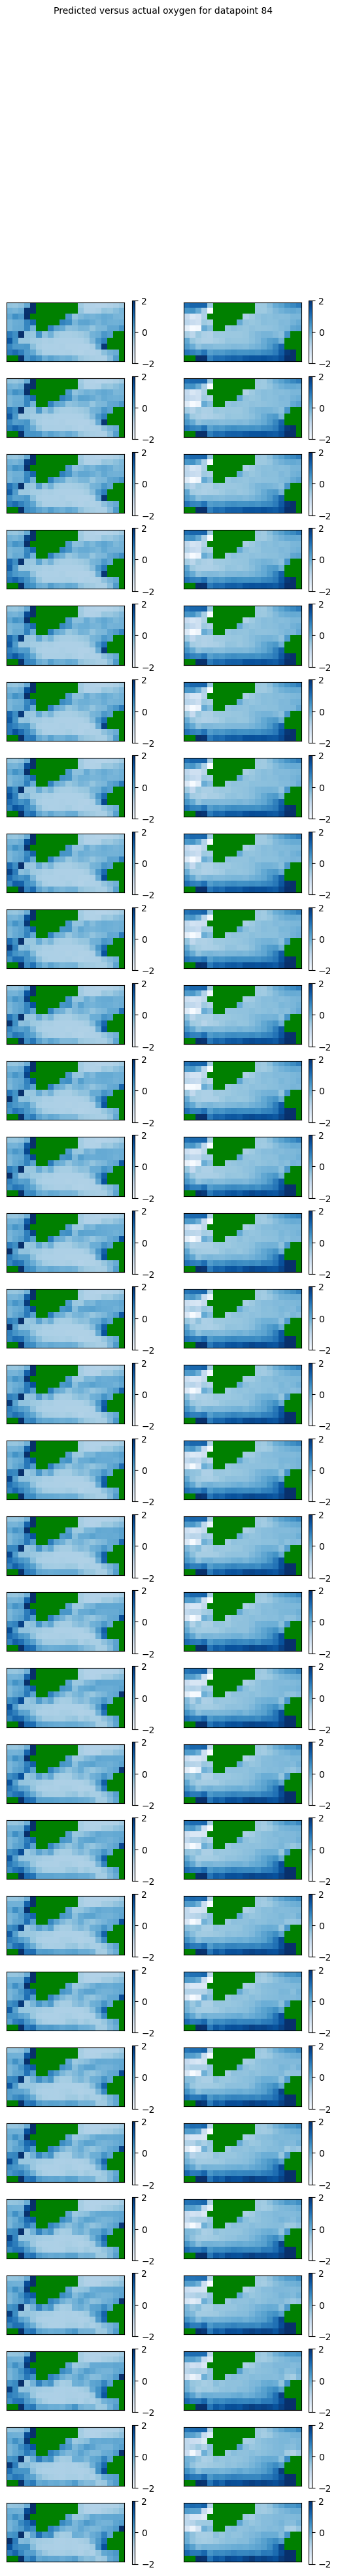

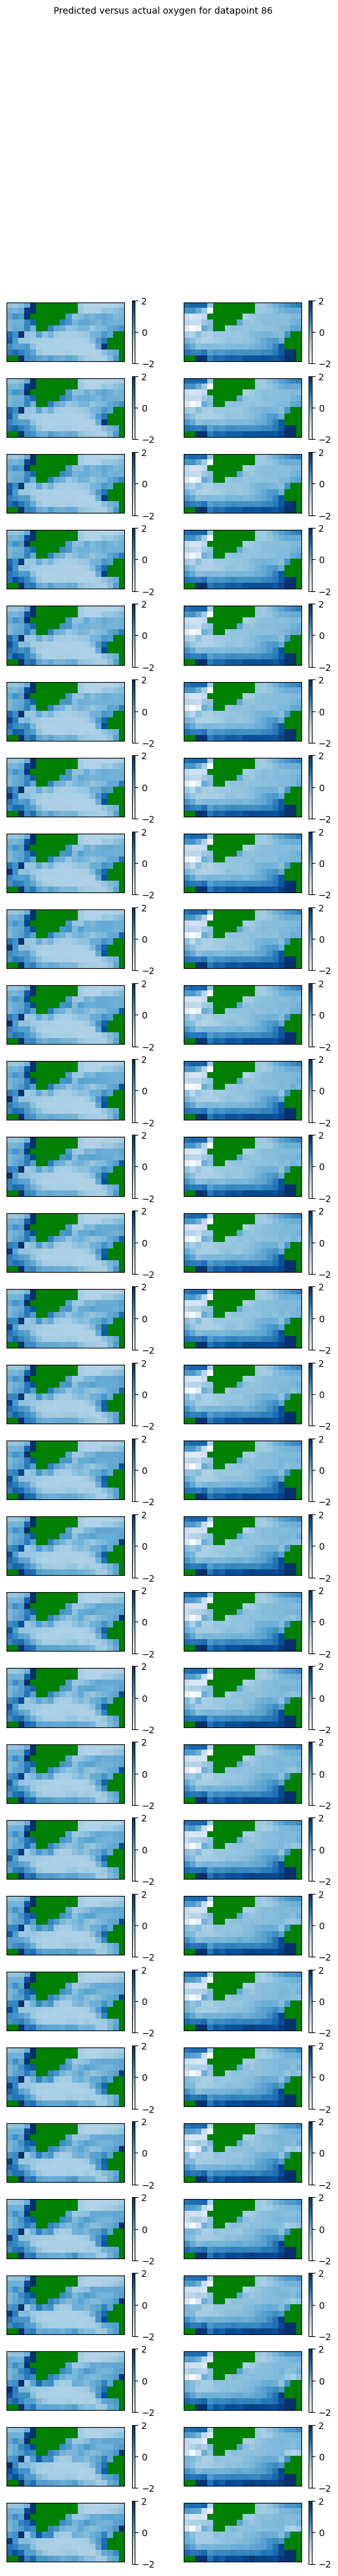

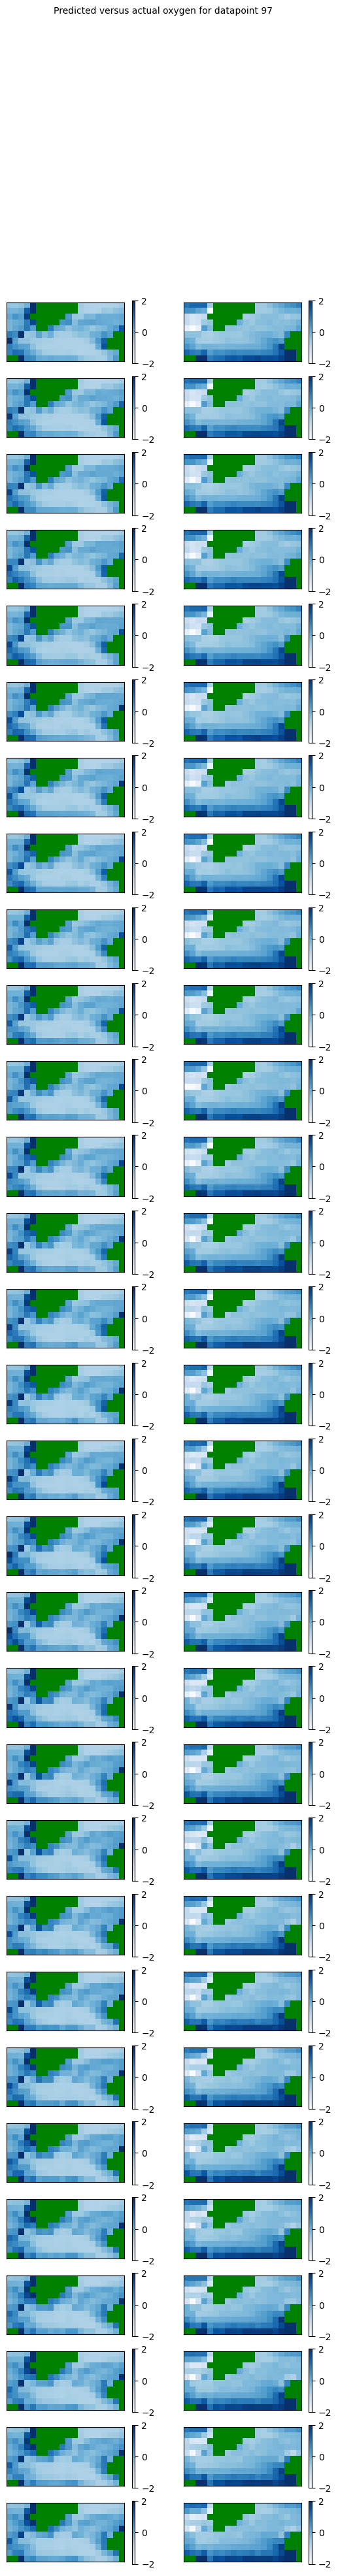

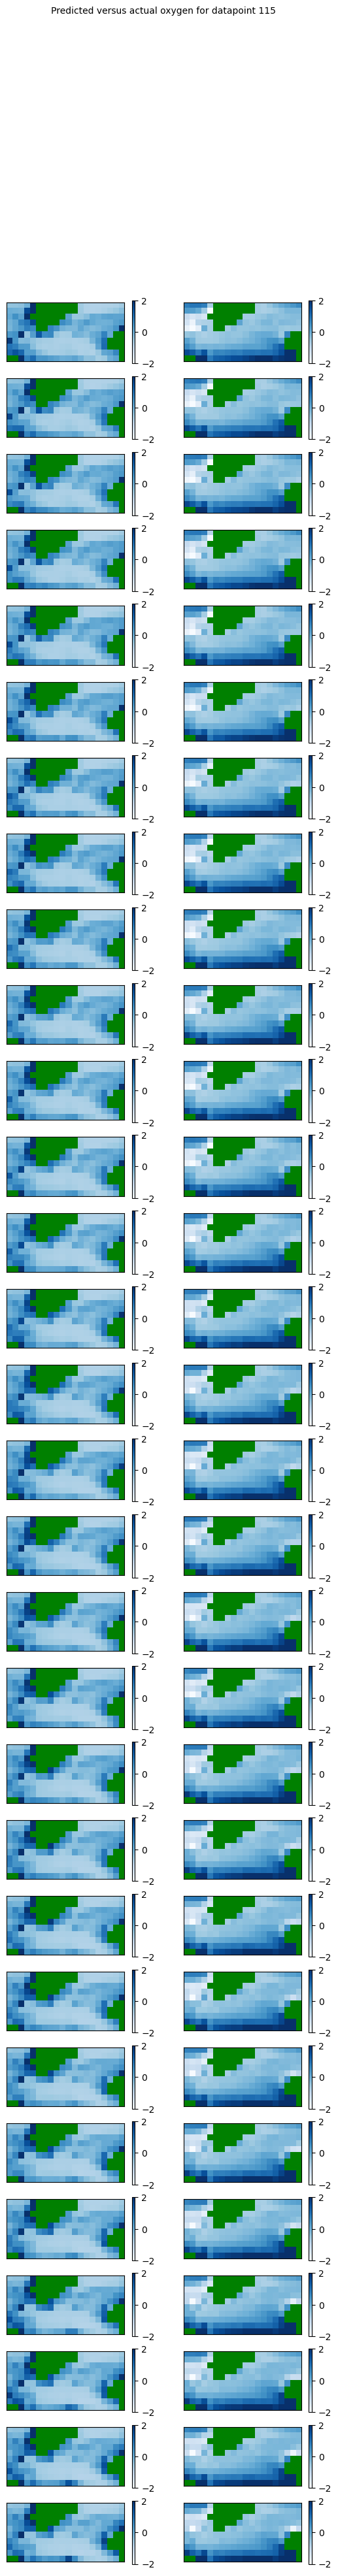

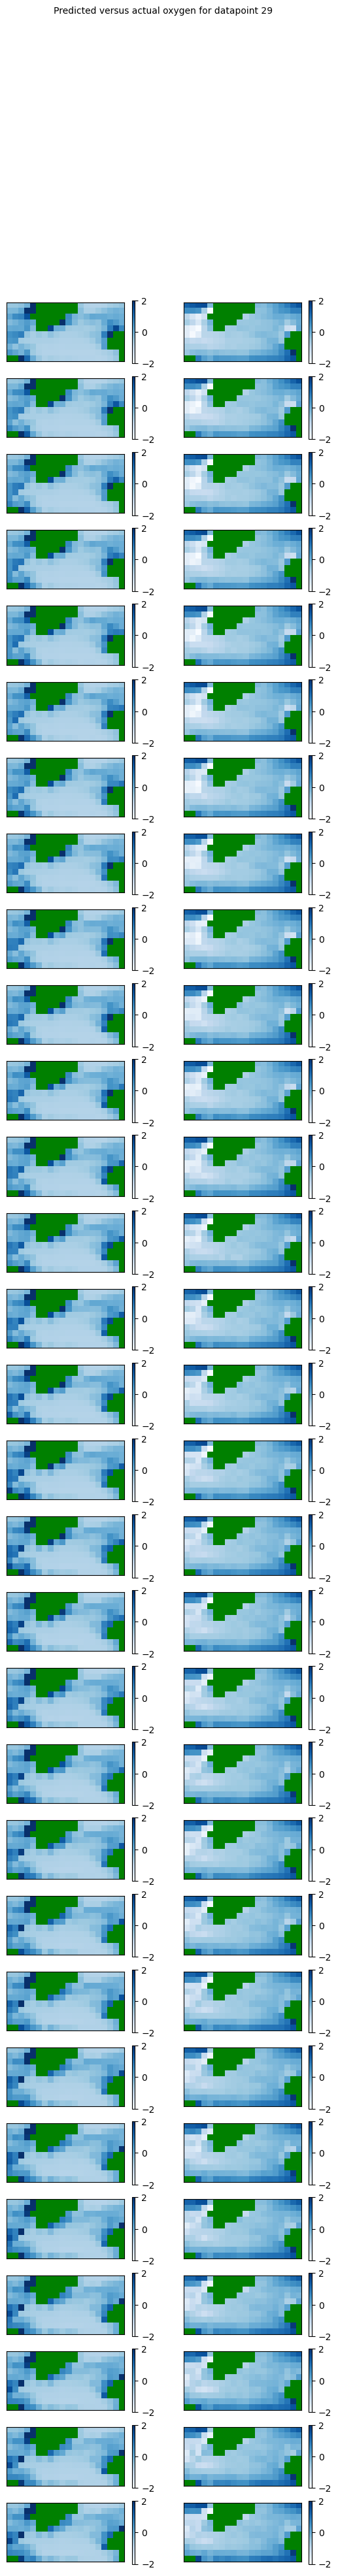

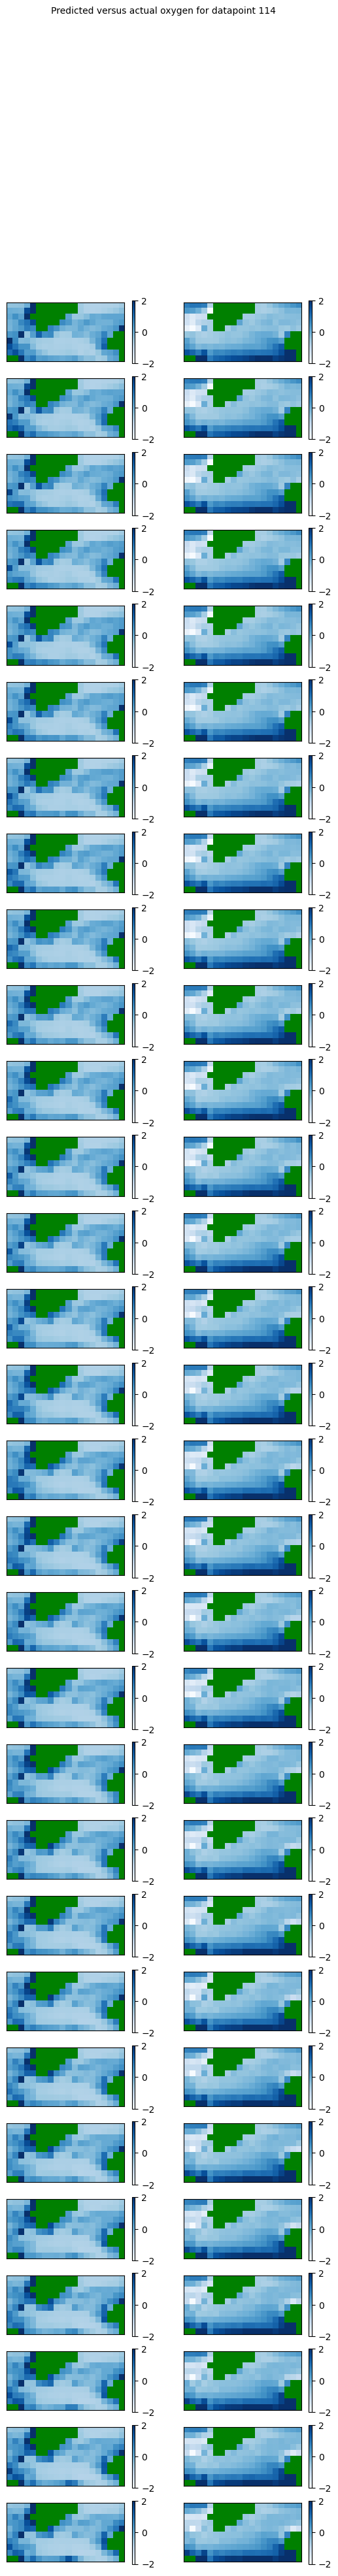

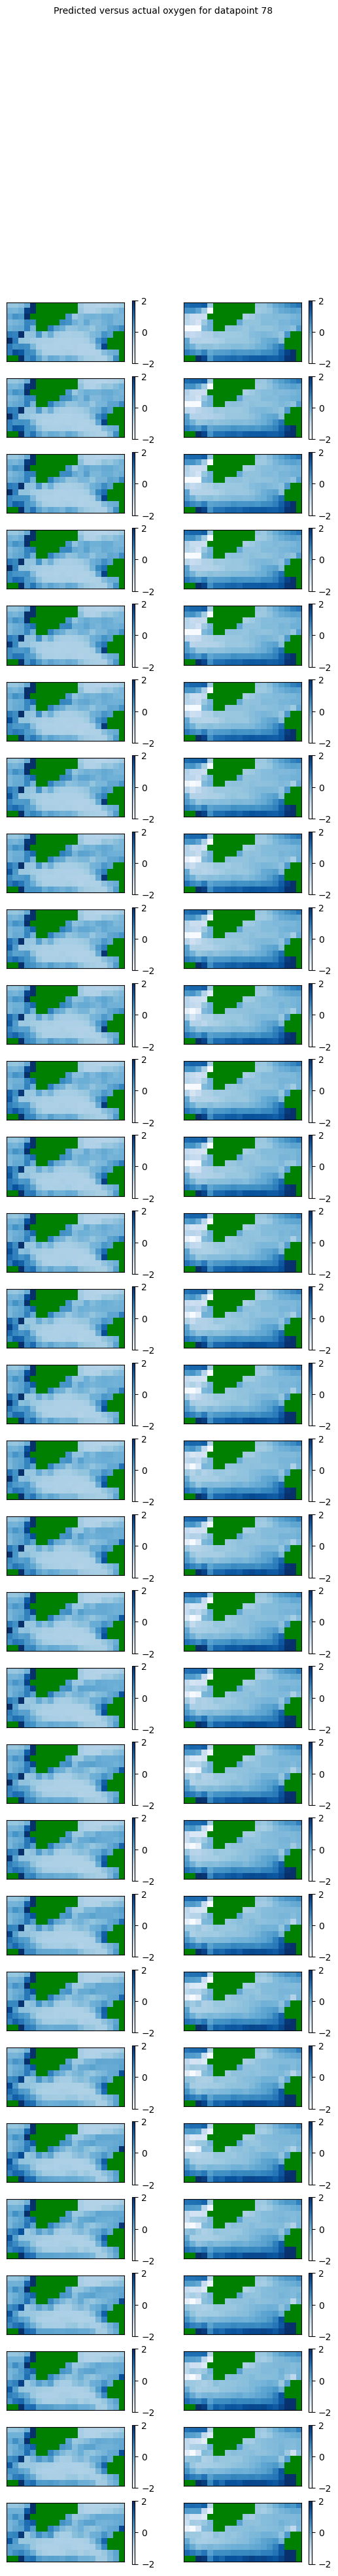

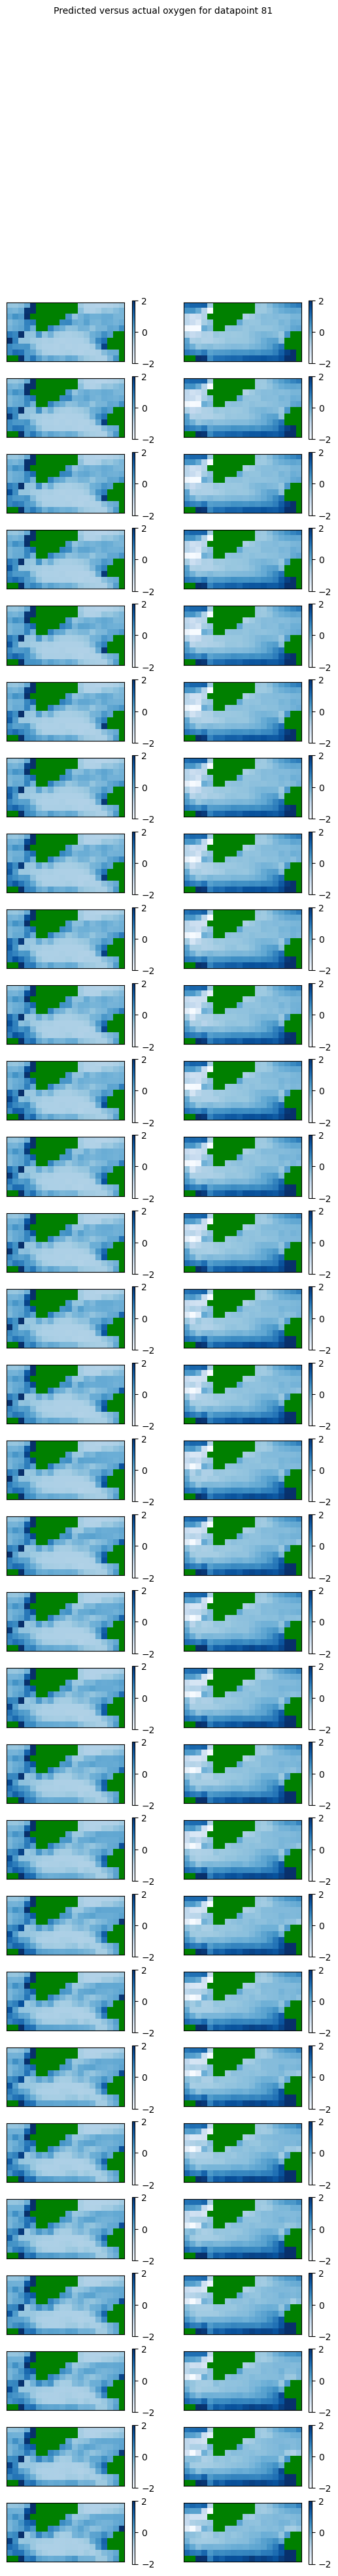

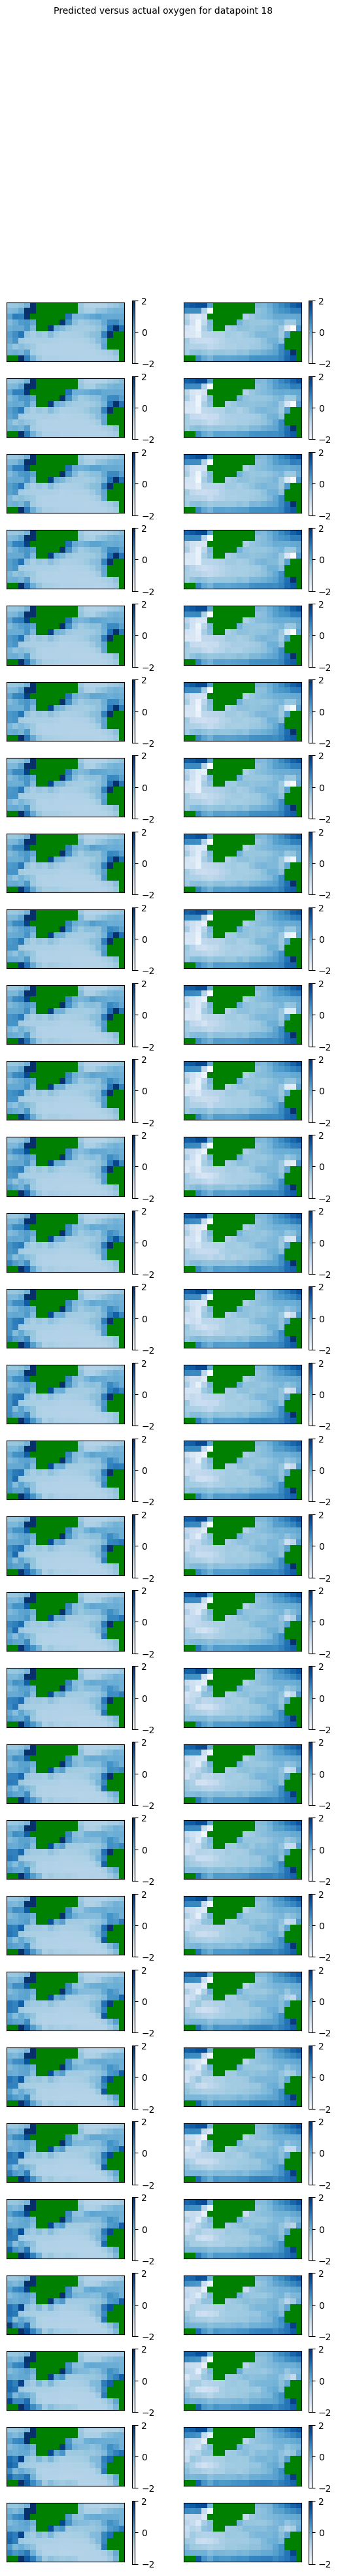

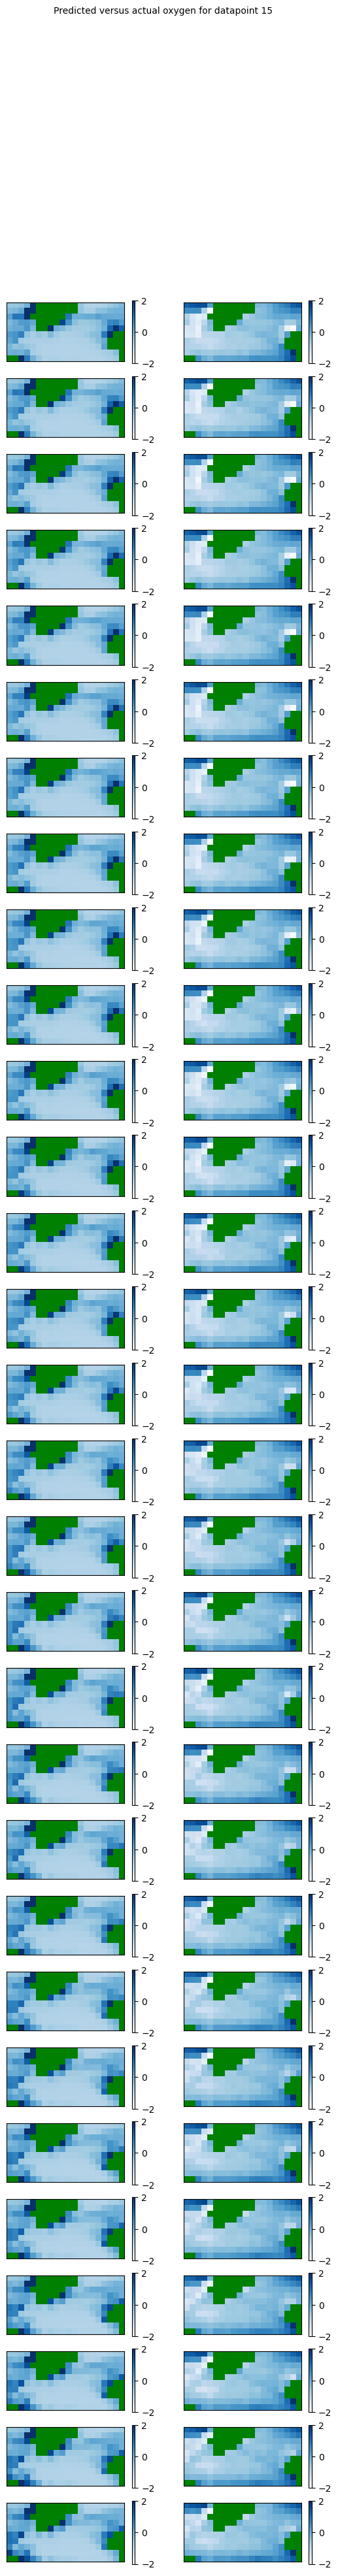

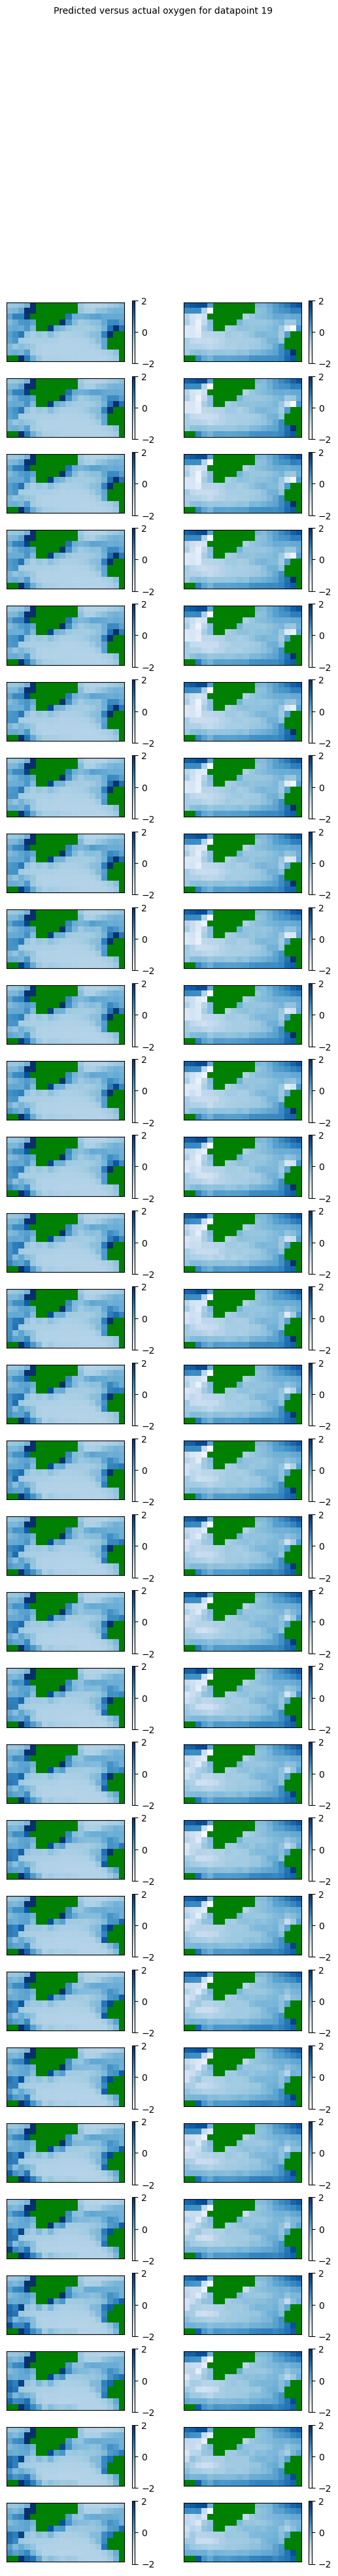

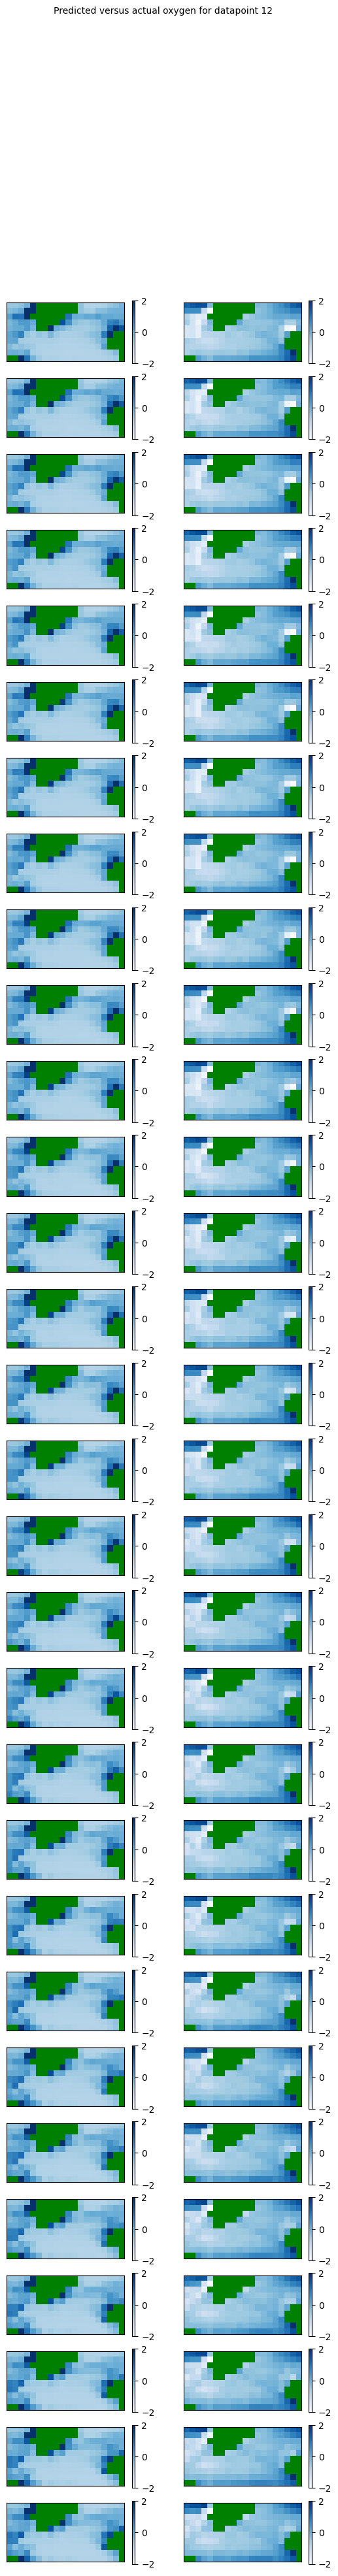

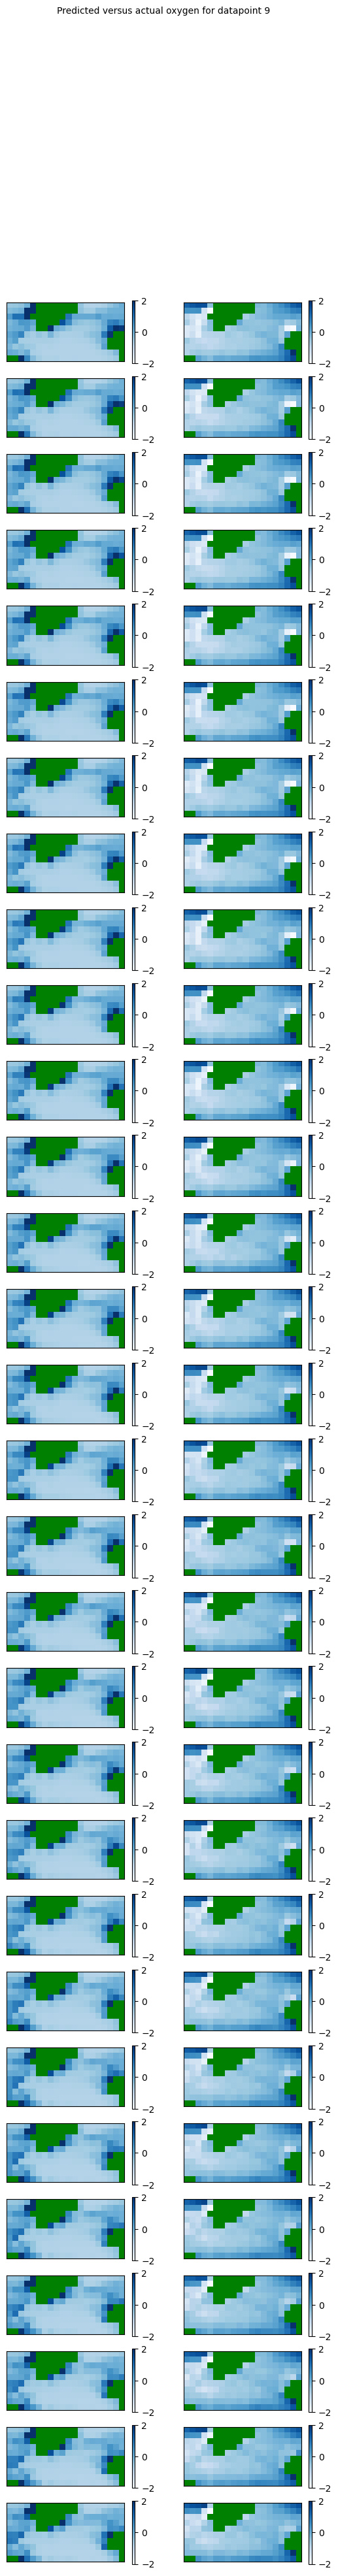

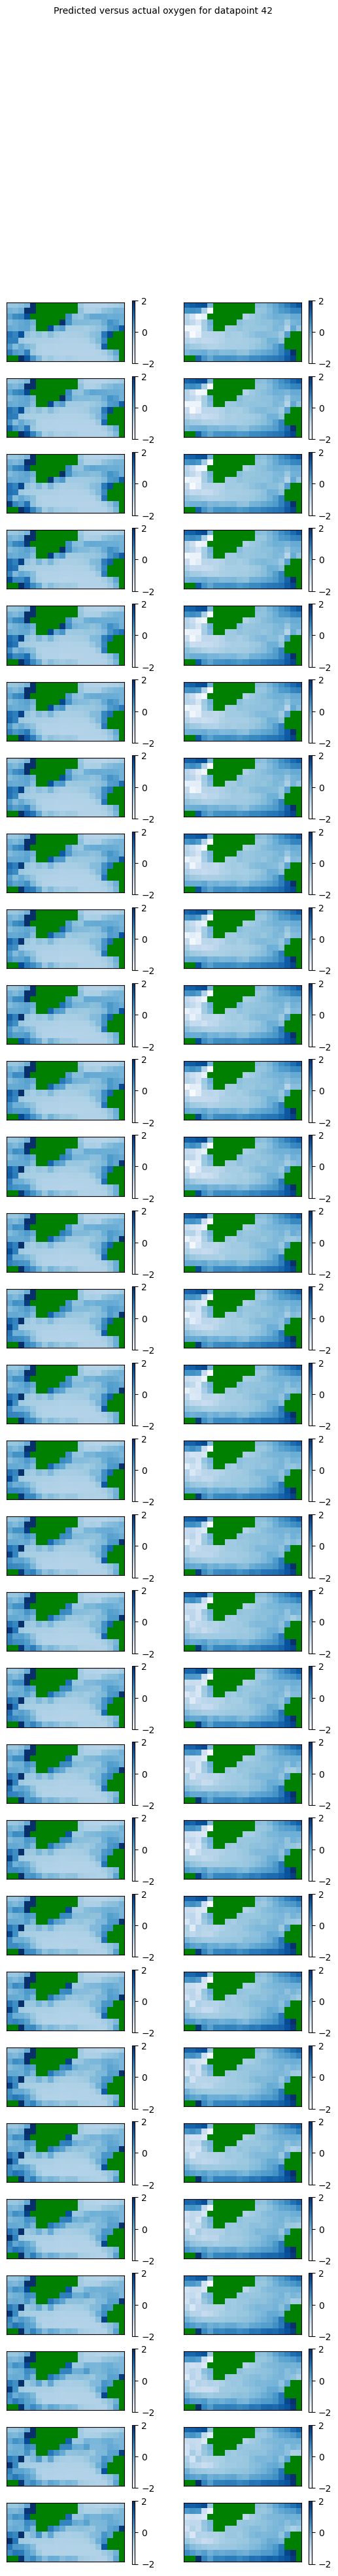

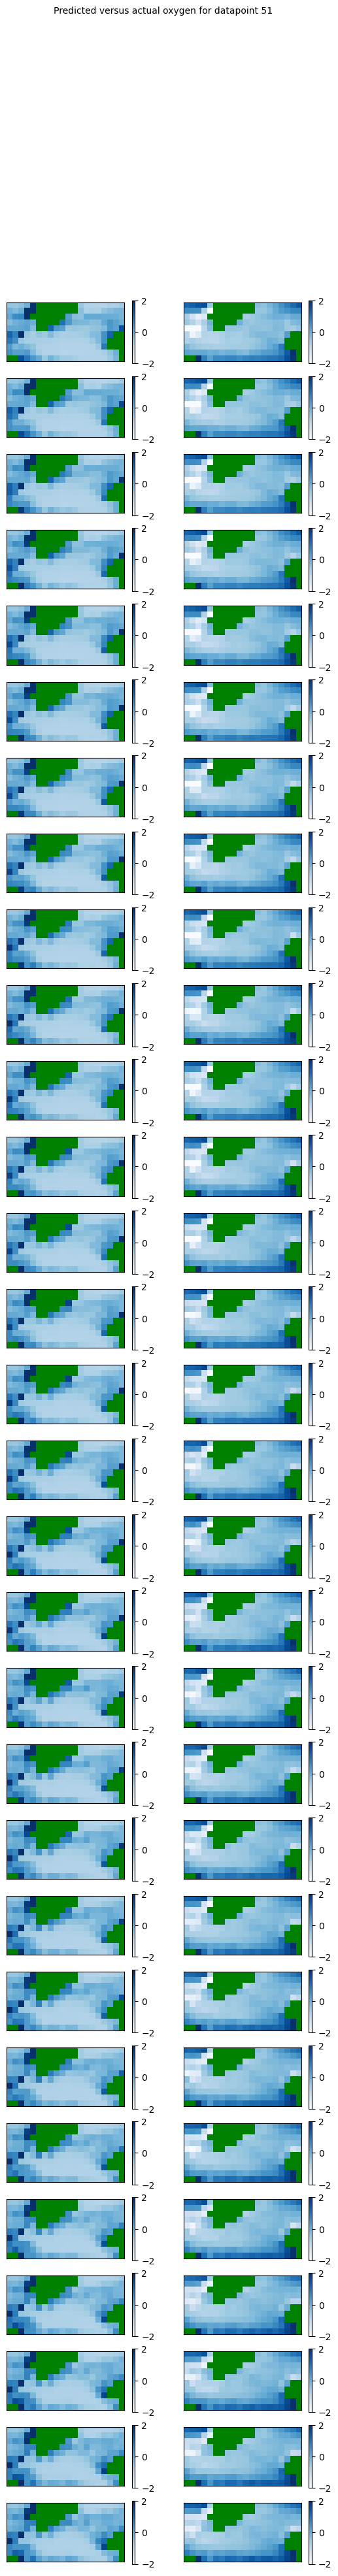

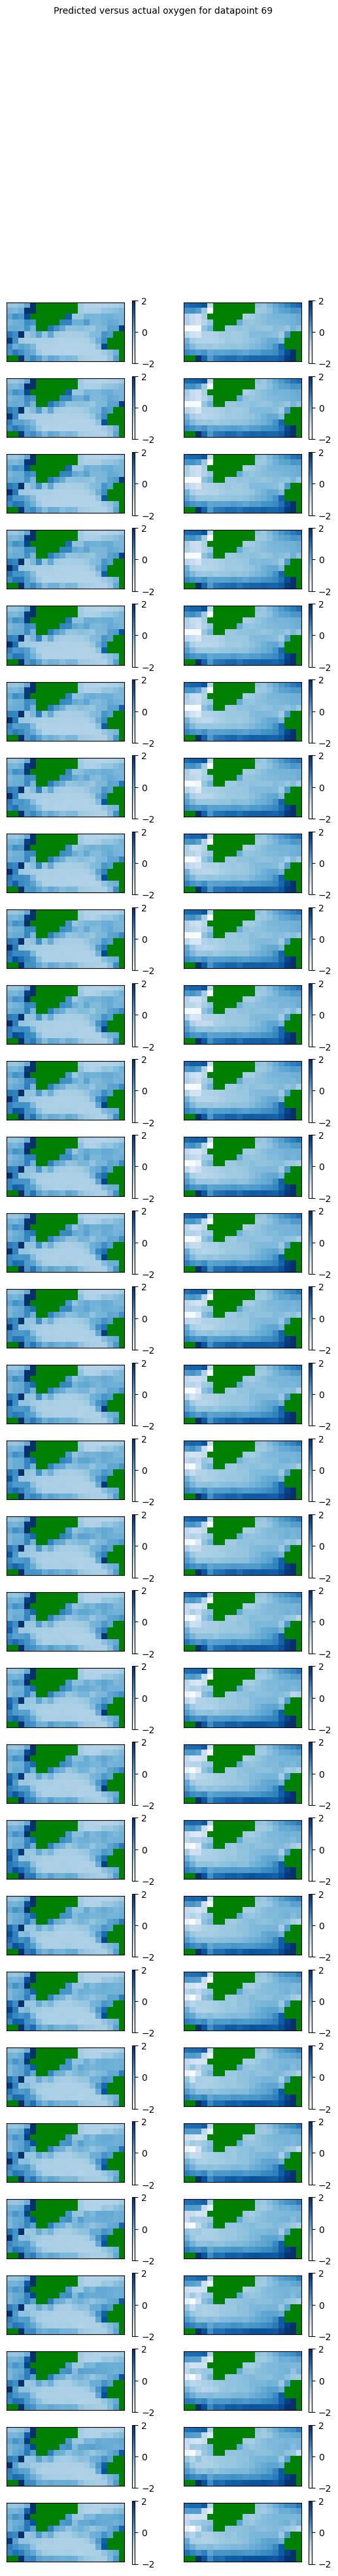

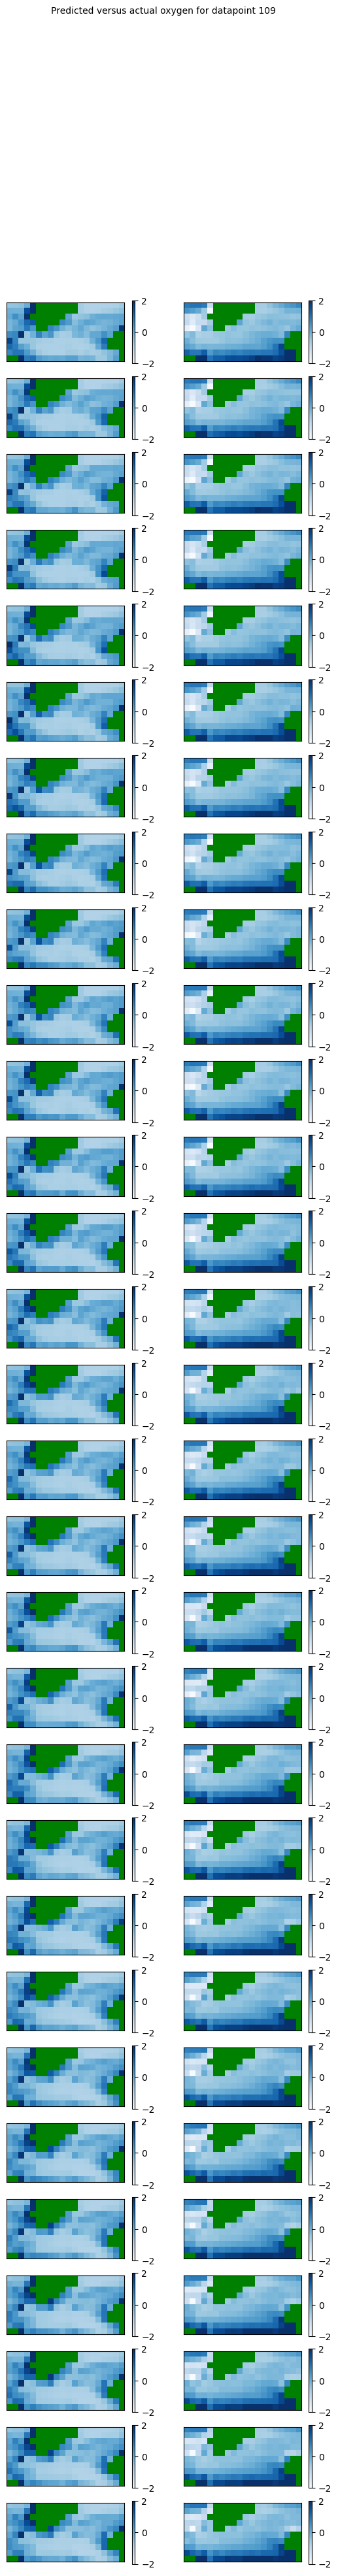

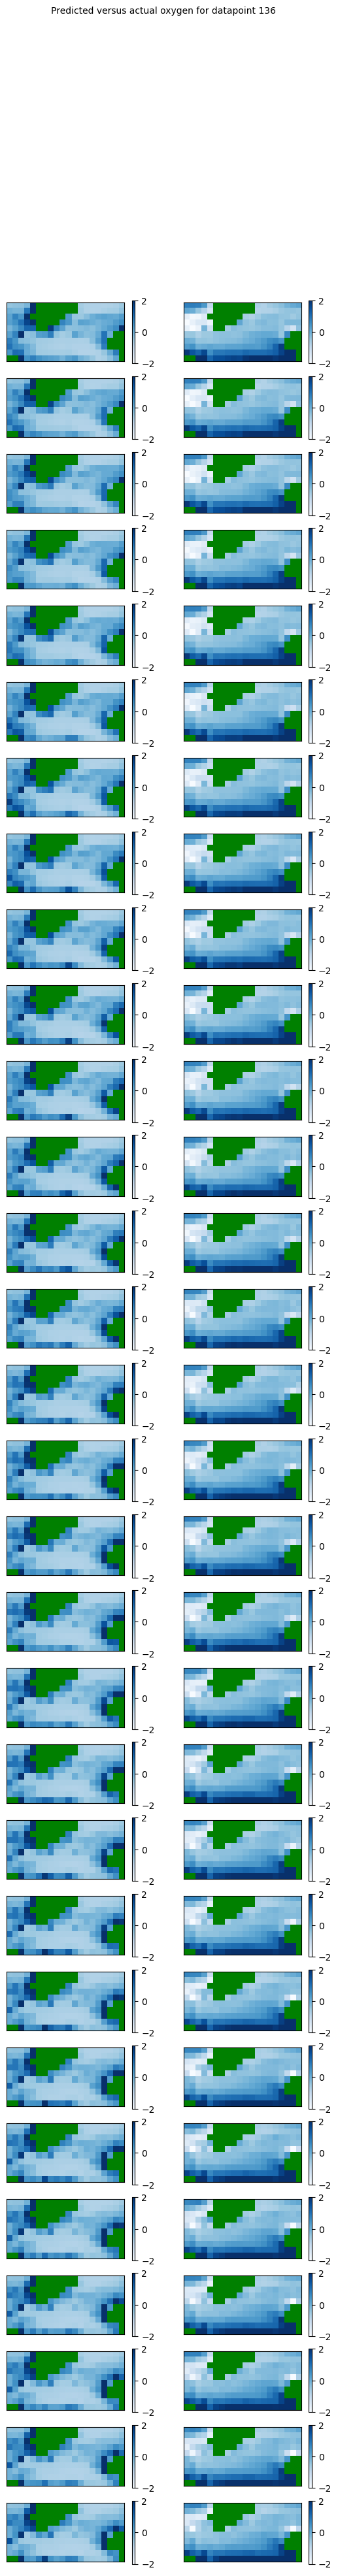

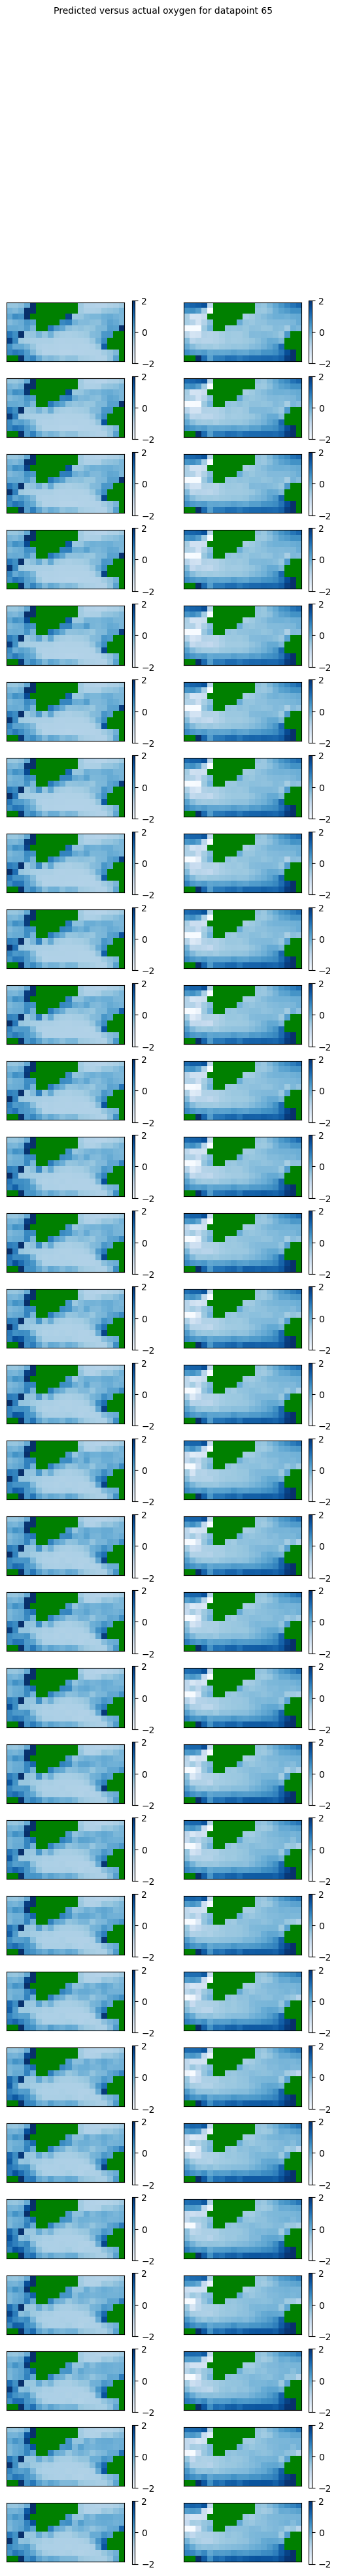

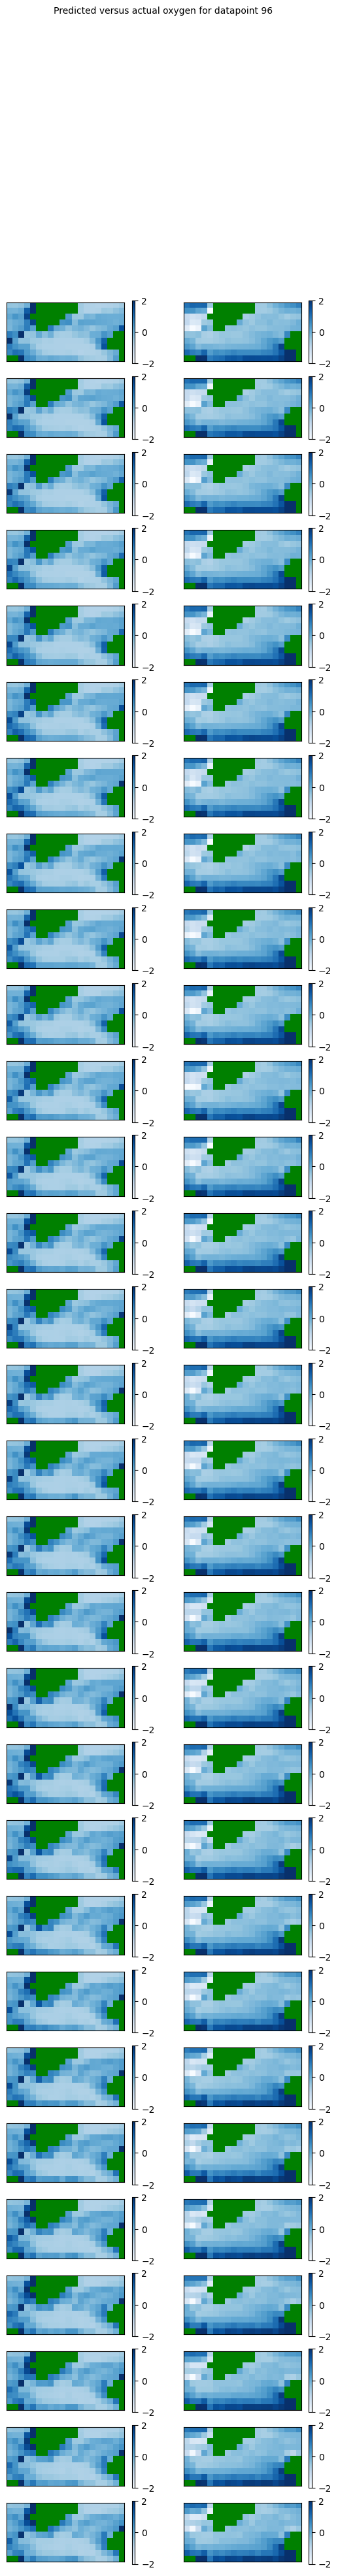

In [313]:
for i, ind in enumerate(sample_indices):
    y_pred_ = y_pred_arr[ind, :, 0, :, :]
    y_test_ = y_test_arr[ind, :, 0, :, :]

    fig, axes = plt.subplots(30, 2)

    fig.set_figheight(45)
    
    fig.suptitle(f'Predicted versus actual oxygen for datapoint {ind}', fontsize=10)
    
    for j in range(30):
        axs = axes[j]
        axs[0].get_xaxis().set_ticks([])
        axs[0].get_yaxis().set_ticks([])
        axs[1].get_xaxis().set_ticks([])
        axs[1].get_yaxis().set_ticks([])
        t = axs[0].imshow(y_test_[j], cmap=cmap, vmin=-2, vmax=2)
        p = axs[1].imshow(y_pred_[j], cmap=cmap, vmin=-2, vmax=2)
        fig.colorbar(t, ax=axs[0], location='right')
        fig.colorbar(p, ax=axs[1], location='right')
    
    plt.savefig(f'graph_point_{ind}.pdf', format='pdf')
    plt.show()